In [1]:
from aplf.kaggle.titanic import  graph
from distributed import Client, progress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
c = Client('dask-scheduler:8786')
c.restart()

Client Scheduler: tcp://dask-scheduler:8786 Dashboard: http://dask-scheduler:8787/status,Cluster Workers: 1 Cores: 2 Memory: 16.67 GB


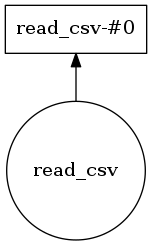

In [3]:
graph.train_df.visualize()

In [4]:
train_df = c.compute(graph.train_df, sync=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
preprocessed_train_df = c.compute(graph.preprocessed_train_df, sync=True)
preprocessed_train_df.head()

,FareBin,AgeBin,Fsize,NameLen,TitleCode,Pclass,SexCode,Embarked,Survived
0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[0.0, 1.0]","[0.0, 0.0, 1.0]",0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]","[1.0, 0.0, 0.0]",1
2,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[1.0, 0.0]","[0.0, 0.0, 1.0]",1
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 1.0]",1
4,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[0.0, 1.0]","[0.0, 0.0, 1.0]",0


In [7]:
preprocessed_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
FareBin      891 non-null object
AgeBin       891 non-null object
Fsize        891 non-null object
NameLen      891 non-null object
TitleCode    891 non-null object
Pclass       891 non-null object
SexCode      891 non-null object
Embarked     891 non-null object
Survived     891 non-null int64
dtypes: int64(1), object(8)
memory usage: 62.7+ KB


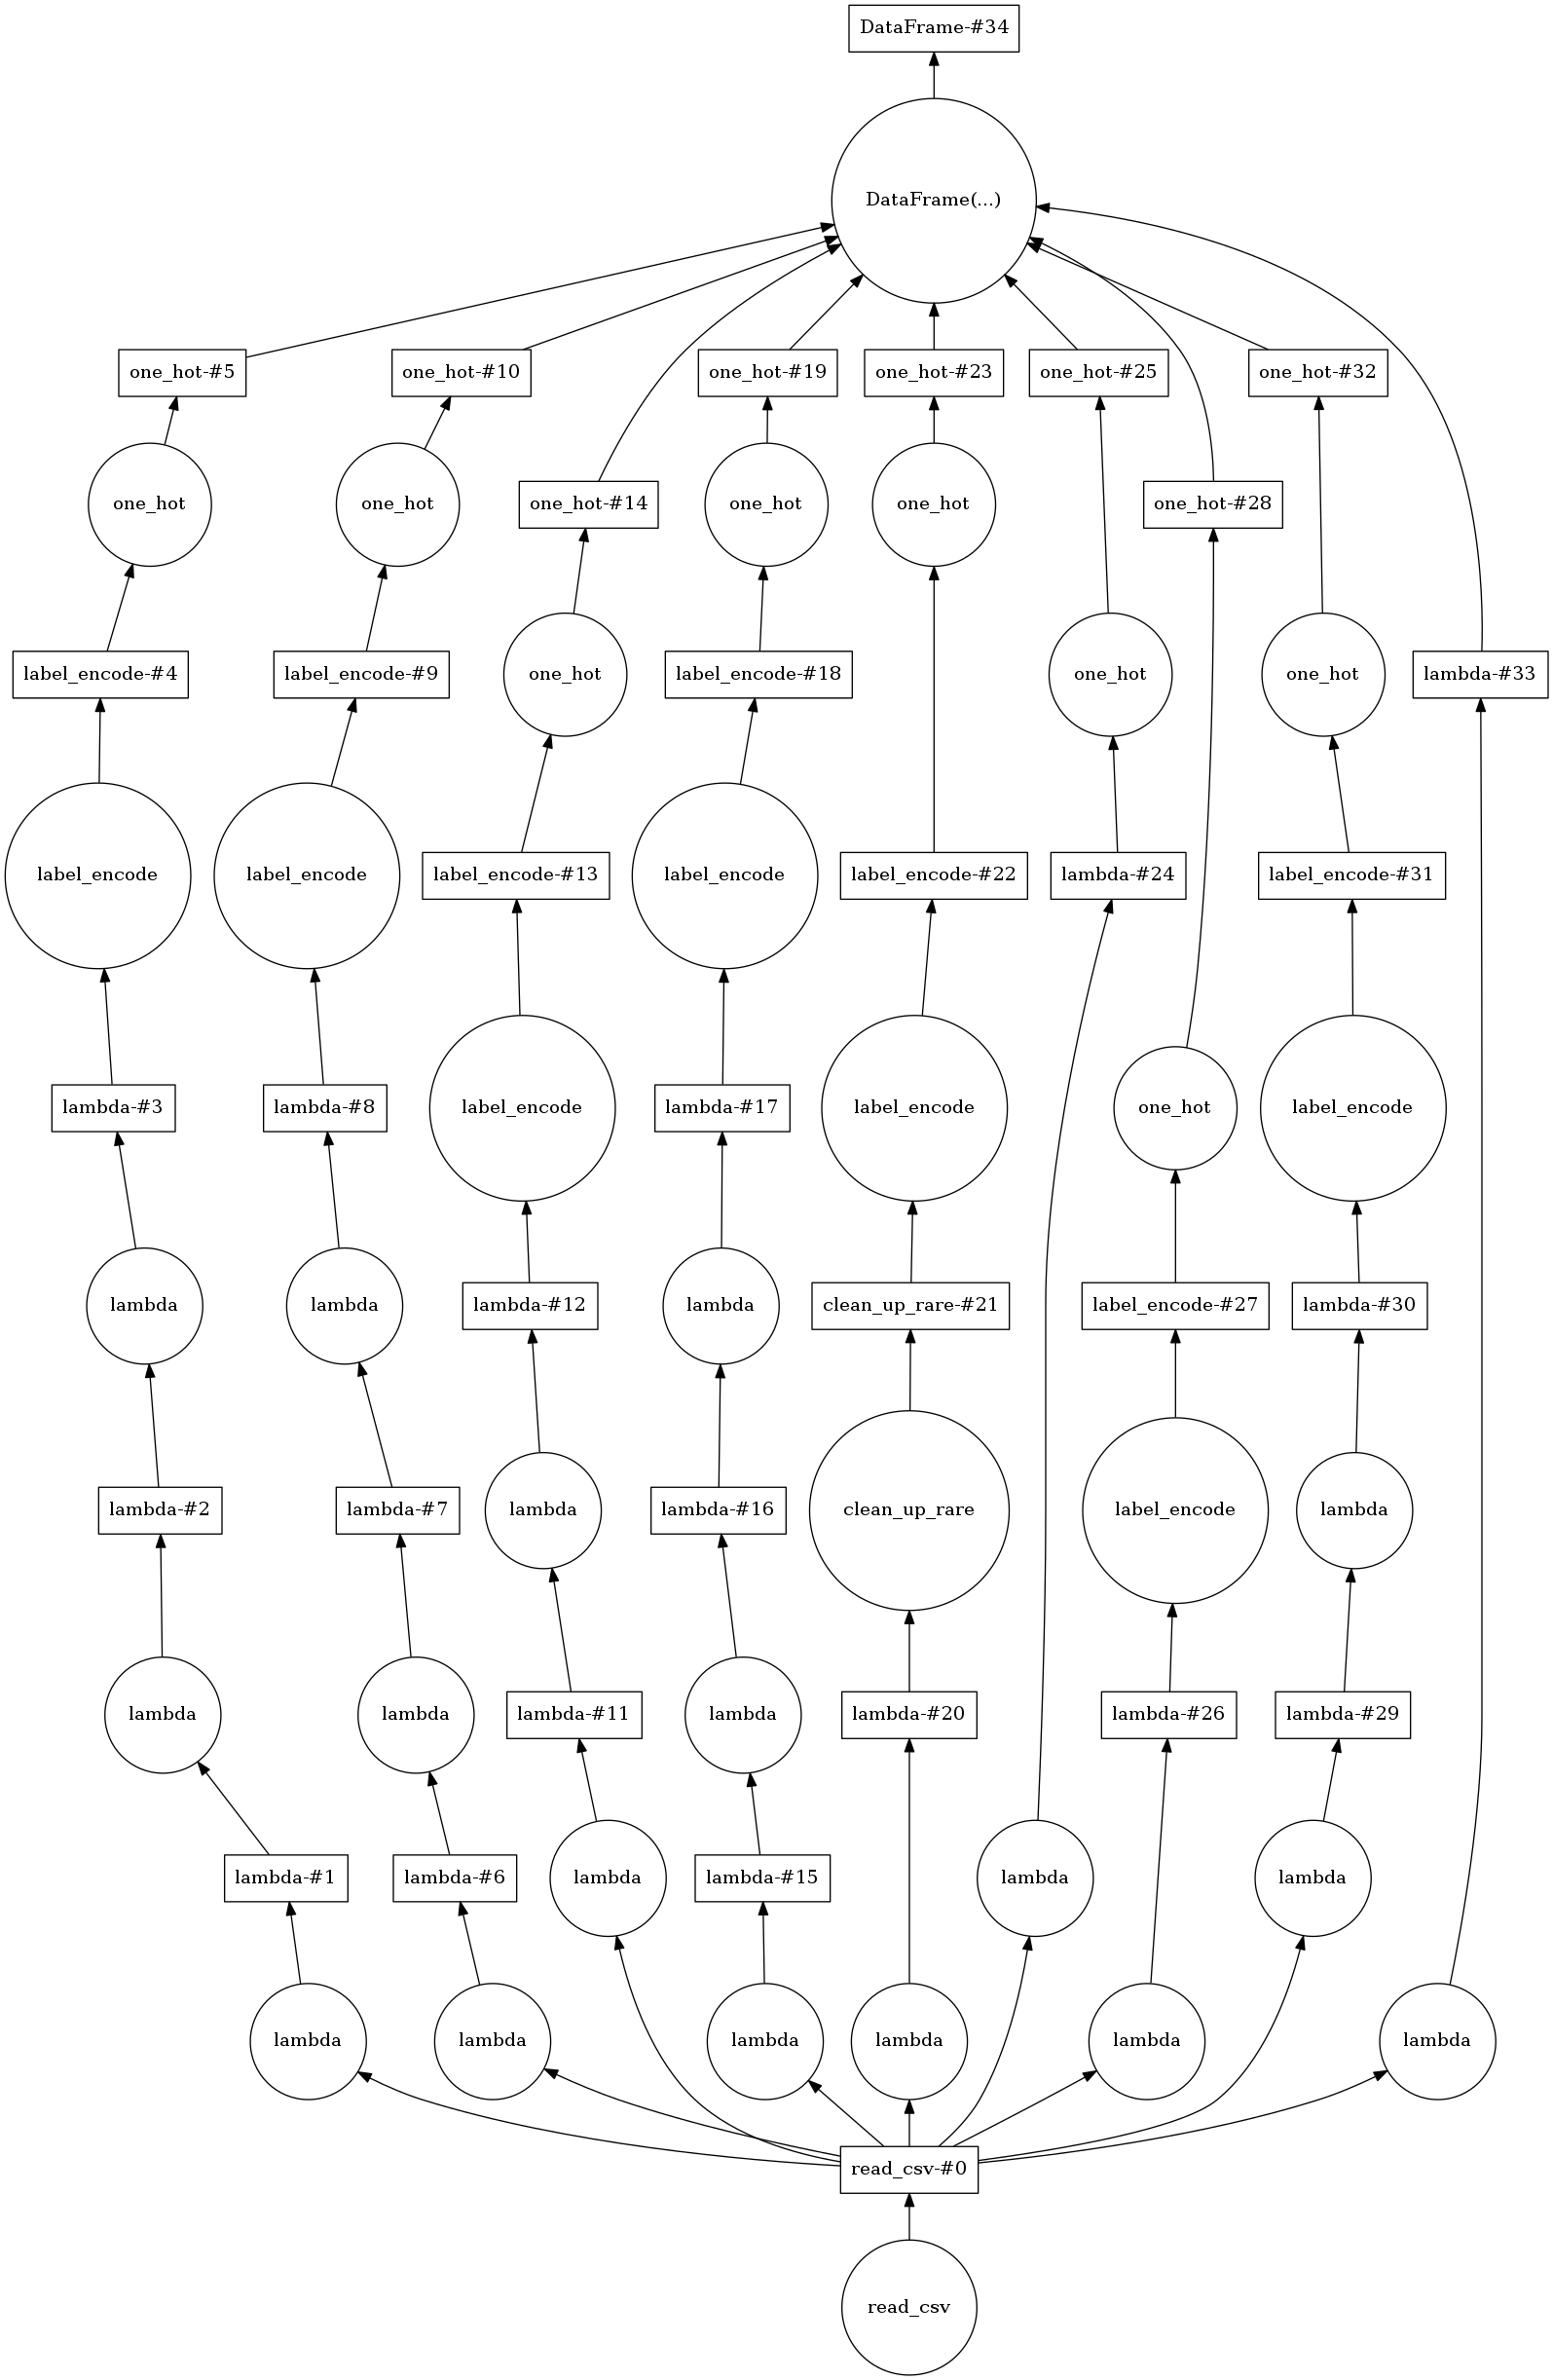

In [8]:
graph.preprocessed_train_df.visualize()

In [9]:
x = graph.predict_result # start computation in the background
progress(x)      # watch progress
predict_df = x.compute() 

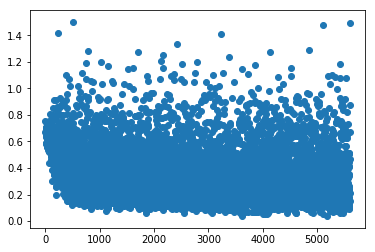

In [10]:
train_progress_df = pd.read_json('/store/kaggle/titanic/train_loss.json')
plt.scatter(x=train_progress_df.index, y=train_progress_df['loss'])
plt.show()

In [11]:
(preprocessed_train_df['Survived'] == predict_df).mean()

0.8630751964085297

In [12]:
train_df[
    (preprocessed_train_df['Survived'] == predict_df) &
    (train_df['Age'] < 27) &
    (train_df['Age'] > 20) &
    (train_df['Fare'] < 10)
].sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S


In [13]:
train_df[
    (preprocessed_train_df['Survived'] != predict_df) &
    (train_df['Age'] < 27) &
    (train_df['Age'] > 20) &
    (train_df['Fare'] < 10)
].sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.225,NaN,C
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.750,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.000,NaN,S
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.775,NaN,S
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.750,NaN,Q
